In [37]:
from fenics import *
import numpy as np

#
# path  = "/Users/1321143263qq.com/Dropbox/ScientificProject/1PaperProject/2023/Cassini_oval/results/fem_solutions/full_geo_degin/save_xml_mesh_case2"
# mesh = Mesh(path+"/mesh13.xml");
mesh = RectangleMesh(Point(0, 0), Point(1, 1), 100, 100)
coordinates = mesh.coordinates()
x_min, y_min = np.amin(coordinates, axis=0)[:2]
x_max, y_max = np.amax(coordinates, axis=0)[:2]

In [38]:
V = VectorFunctionSpace(mesh, 'P', 1)
# Define boundary conditions
tol = 1E-14
# Define boundary conditions
def left_boundary(x, on_boundary):
    return on_boundary and abs(x[0] - x_min) < DOLFIN_EPS
def right_boundary(x, on_boundary):
    return on_boundary and abs(x[0] - x_max) < DOLFIN_EPS
def upper_right_corner(x, on_boundary):
    return near(x[0], x_max) and near(x[1], y_max)
def top_boundary(x, on_boundary):
    return on_boundary and abs(x[1] - y_max) < DOLFIN_EPS and x[0] > x_max - 200
def bottom_boundary(x, on_boundary):
    return on_boundary and abs(x[1] - y_min) < DOLFIN_EPS


# Define the Dirichlet boundary and Neumann boundary



In [39]:
# Dirichlet boundary 
bc_left = DirichletBC(V, Constant((0.0, 0.0)), left_boundary) # fixed left boundary
bc_bottom = DirichletBC(V.sub(1), Constant(0.0), bottom_boundary) # fixed bottom boundary

# Neumann boundary, measure ds_right on right_boundary
boundary_markers = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundary_markers.set_all(0)  # Initialize with default value 0
right_ = AutoSubDomain(lambda x, on_boundary: near(x[0], x_max) and on_boundary)
right_.mark(boundary_markers, 1)# Mark facets on right boundary with 1
ds_right = Measure('ds', domain=mesh, subdomain_data=boundary_markers, subdomain_id=1)
bcs = [bc_left,bc_bottom]


In [40]:
# Define material properties
E = Constant(1e6)
nu = Constant(0.3)

# Define strain and stress
def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)

def sigma(u):
    return 2*nu*E*epsilon(u) + (E/(1-nu**2))*tr(epsilon(u))*Identity(2)
u = TrialFunction(V)
v = TestFunction(V)
B = Constant((0.0, 0.5))  # Body force per unit volume
T = Constant((10,  0.0))  # Traction force on the boundary
a = inner(sigma(u), epsilon(v))*dx
L = dot(B, v)*dx + dot(T, v)*ds_right
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.


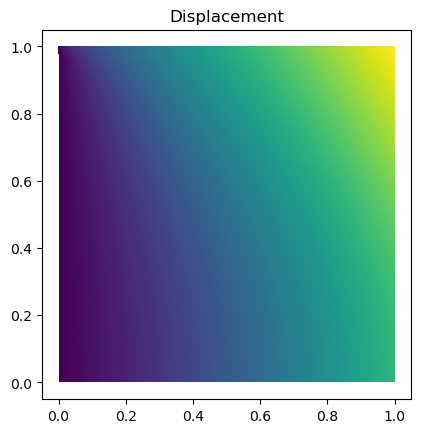

In [41]:
plot(u, title='Displacement', mode='displacement')